## Dataset about Vinho Verde Wines
#### Contains
<ul>
    <li>5000 kinds of wine</li>
    <li>11 different physichemical properties</li>
</ul>

#### Objective
<p> Search for factors that correlate with a wine being high-quality.</p>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [25]:
wine_data_df = pd.read_csv("vinhoVerde.csv").sort_values(by="quality", ascending=True)

In [26]:
wine_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5409,6.8,0.260,0.34,15.10,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,white
2339,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white
3016,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,red
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,red


In [27]:
white_wine_df = wine_data_df.loc[(wine_data_df["type"] == "white")]

red_wine_df = wine_data_df.loc[(wine_data_df["type"] == "red")]

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64

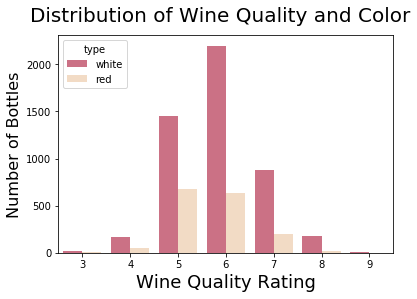

In [32]:
plt.rcParams["font.family"] = "avenir"
plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(x="quality",
                  hue="type",
                  data=wine_data_df,
                  palette=["#da627d", "#f9dbbd"])

ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

wine_data_df.groupby(["quality", "type"]).size()
